
STARTING DISEASE ANALYZER PROJECT
DISEASE ANALYZER - COMPREHENSIVE ANALYSIS

1. DATASET OVERVIEW:
   Total Records: 500
   Total Diseases: 10
   Time Period: Simulated Data

2. DISEASE FREQUENCY:
   Influenza: 62 cases
   Hypertension: 57 cases
   Cancer: 55 cases
   Heart Disease: 54 cases
   Tuberculosis: 51 cases

3. DISEASE SUMMARY STATISTICS:
           Total_Cases  Avg_Recovery_Days  Avg_Mortality_Rate  \
Disease                                                         
Arthritis         2259              47.35                3.78   
Asthma            2311              44.25                3.25   
COVID-19          2011              48.00                3.55   
Cancer            2930              41.25                3.70   
Diabetes          2159              47.24                3.60   

          Most_Common_Severity  
Disease                         
Arthritis                 Mild  
Asthma                    Mild  
COVID-19                  Mild  
Cancer                    Mi

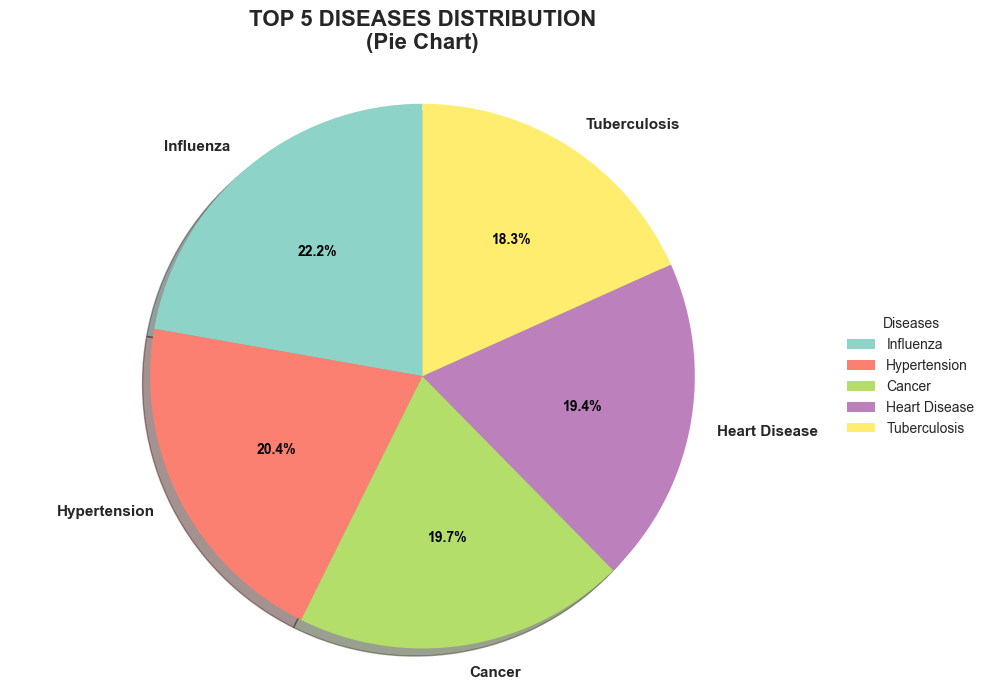


✓ Pie chart saved as 'disease_pie_chart.png'


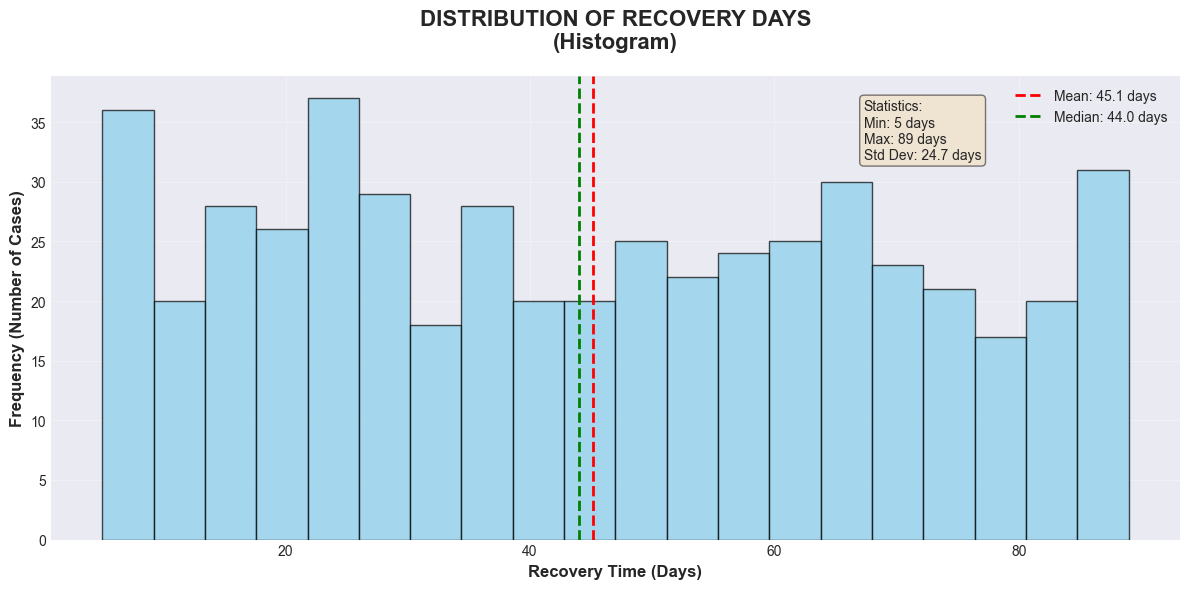


✓ Histogram saved as 'recovery_histogram.png'


<Figure size 1200x700 with 0 Axes>

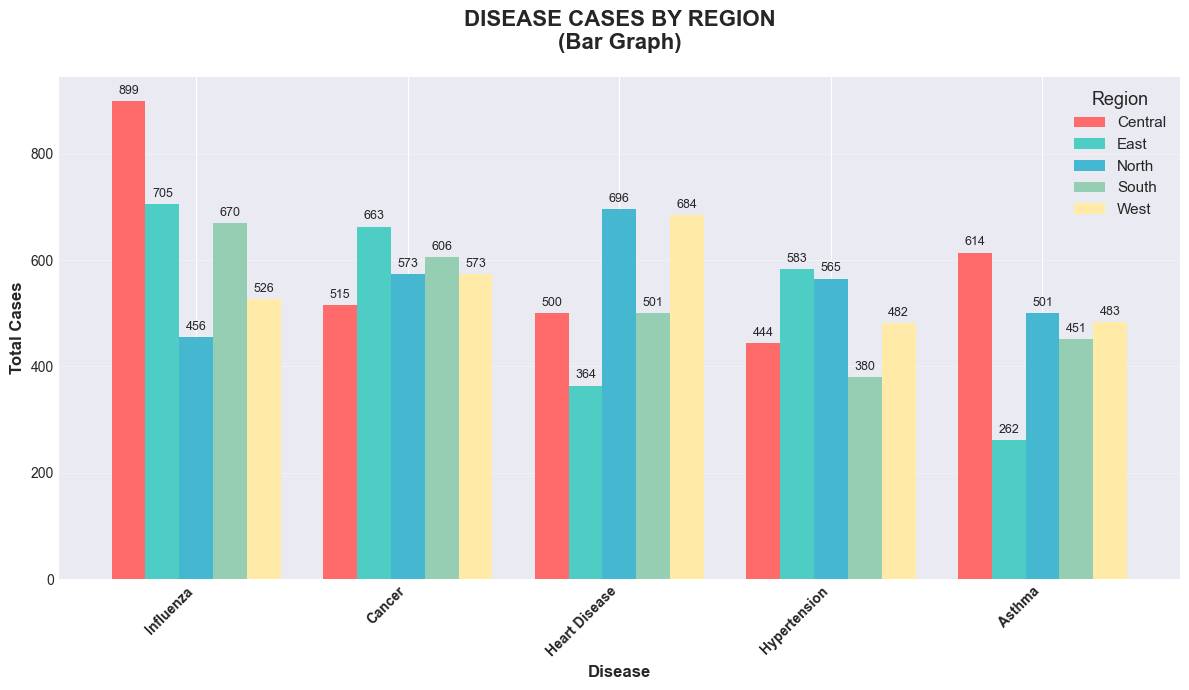


✓ Bar graph saved as 'disease_bar_graph.png'


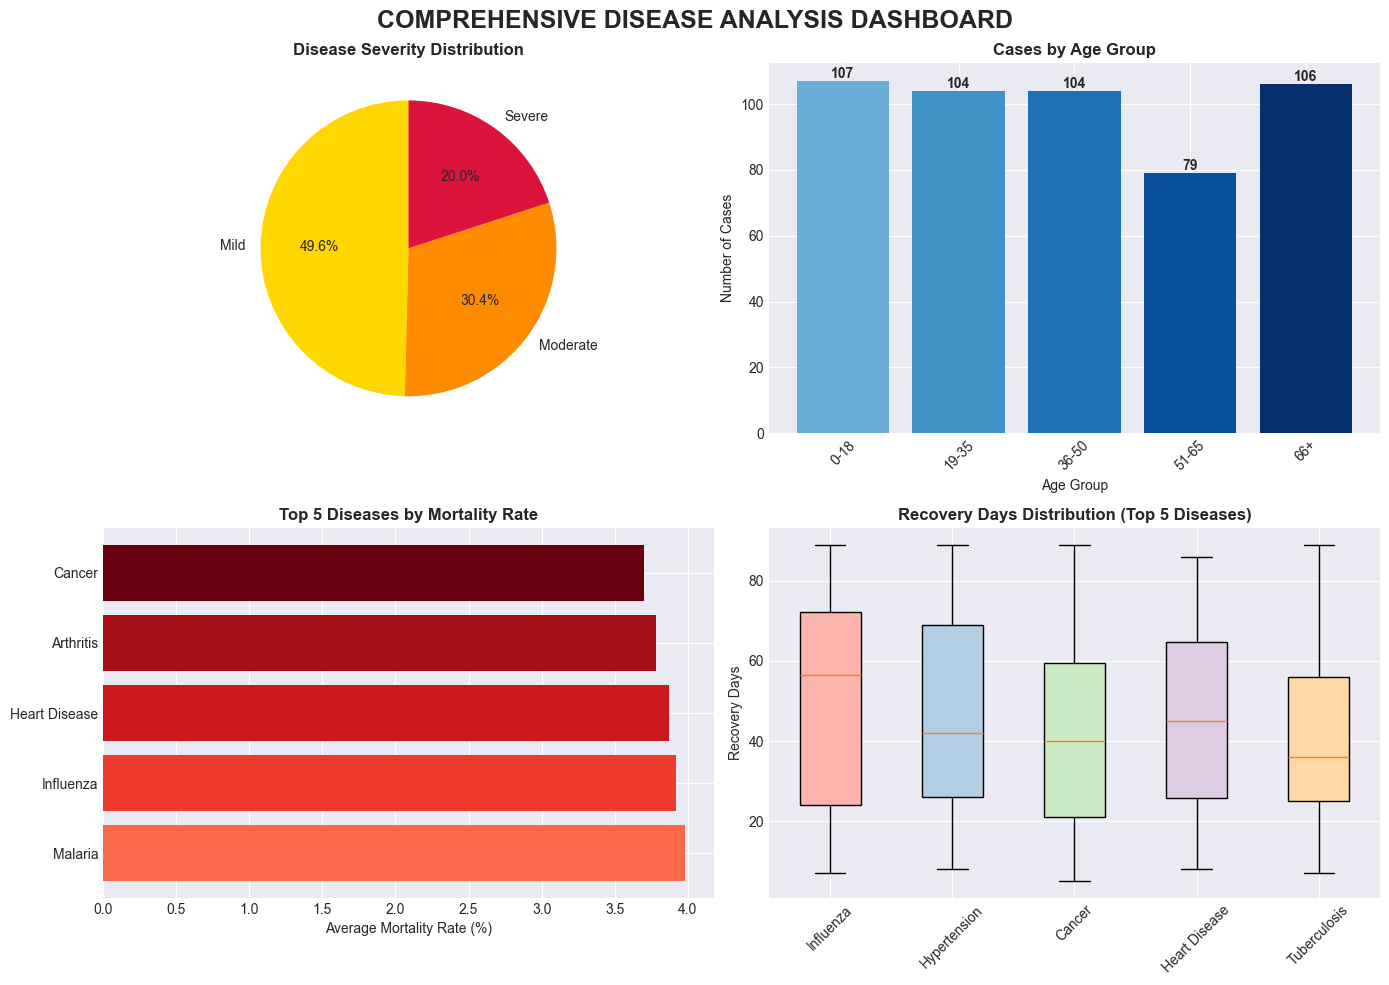


✓ Comprehensive dashboard saved as 'comprehensive_dashboard.png'

ANALYSIS COMPLETE - KEY FINDINGS

KEY STATISTICS:
1. Most common disease: Influenza
2. Average recovery time: 45.1 days
3. Most affected age group: 0-18
4. Region with highest cases: Central
5. Most common severity: Mild

FILES GENERATED:
1. disease_pie_chart.png - Pie chart of disease distribution
2. recovery_histogram.png - Histogram of recovery days
3. disease_bar_graph.png - Bar graph of cases by region
4. comprehensive_dashboard.png - Comparative analysis dashboard

PROJECT READY FOR SUBMISSION!


In [1]:
"""
DISEASE ANALYZER PROJECT
College Submission - Python Project
Using: pandas, numpy, matplotlib
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')

class DiseaseAnalyzer:
    """Main class for Disease Analysis"""
    
    def __init__(self):
        """Initialize the analyzer and generate sample data"""
        self.df = self.generate_sample_data()
        self.disease_summary = None
        
    def generate_sample_data(self):
        """Generate sample disease data for analysis"""
        np.random.seed(42)  # For reproducible results
        
        # Create sample diseases
        diseases = ['Influenza', 'Diabetes', 'Hypertension', 'Asthma', 
                   'Arthritis', 'COVID-19', 'Cancer', 'Tuberculosis', 
                   'Malaria', 'Heart Disease']
        
        # Create sample regions
        regions = ['North', 'South', 'East', 'West', 'Central']
        
        # Create age groups
        age_groups = ['0-18', '19-35', '36-50', '51-65', '66+']
        
        # Generate sample data
        data = {
            'Disease': np.random.choice(diseases, 500),
            'Region': np.random.choice(regions, 500),
            'Age_Group': np.random.choice(age_groups, 500),
            'Severity': np.random.choice(['Mild', 'Moderate', 'Severe'], 500, p=[0.5, 0.3, 0.2]),
            'Recovery_Days': np.random.randint(5, 90, 500),
            'Cases': np.random.randint(1, 100, 500)
        }
        
        df = pd.DataFrame(data)
        
        # Add mortality rate based on disease severity
        df['Mortality_Rate'] = np.where(df['Severity'] == 'Mild', 
                                        np.random.uniform(0.1, 1, len(df)),
                                        np.where(df['Severity'] == 'Moderate',
                                                np.random.uniform(1, 5, len(df)),
                                                np.random.uniform(5, 20, len(df))))
        
        return df
    
    def analyze_data(self):
        """Perform comprehensive data analysis"""
        print("=" * 60)
        print("DISEASE ANALYZER - COMPREHENSIVE ANALYSIS")
        print("=" * 60)
        
        # Basic information
        print("\n1. DATASET OVERVIEW:")
        print(f"   Total Records: {len(self.df)}")
        print(f"   Total Diseases: {self.df['Disease'].nunique()}")
        print(f"   Time Period: Simulated Data")
        
        # Disease frequency
        print("\n2. DISEASE FREQUENCY:")
        disease_counts = self.df['Disease'].value_counts()
        for disease, count in disease_counts.head(5).items():
            print(f"   {disease}: {count} cases")
        
        # Create summary statistics
        self.disease_summary = self.df.groupby('Disease').agg({
            'Cases': 'sum',
            'Recovery_Days': 'mean',
            'Mortality_Rate': 'mean',
            'Severity': lambda x: x.mode()[0]
        }).round(2)
        
        self.disease_summary.columns = ['Total_Cases', 'Avg_Recovery_Days', 
                                       'Avg_Mortality_Rate', 'Most_Common_Severity']
        
        print("\n3. DISEASE SUMMARY STATISTICS:")
        print(self.disease_summary.head())
        
        return self.disease_summary
    
    def create_pie_chart(self):
        """Create pie chart for disease distribution"""
        plt.figure(figsize=(10, 7))
        
        # Get top 5 diseases by frequency
        disease_counts = self.df['Disease'].value_counts().head(5)
        
        # Create pie chart
        colors = plt.cm.Set3(np.linspace(0, 1, len(disease_counts)))
        wedges, texts, autotexts = plt.pie(disease_counts.values, 
                                          labels=disease_counts.index,
                                          colors=colors,
                                          autopct='%1.1f%%',
                                          startangle=90,
                                          shadow=True)
        
        # Enhance text appearance
        for text in texts:
            text.set_fontsize(11)
            text.set_fontweight('bold')
        
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
        
        plt.title('TOP 5 DISEASES DISTRIBUTION\n(Pie Chart)', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as circle
        
        # Add legend
        plt.legend(wedges, disease_counts.index,
                  title="Diseases",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))
        
        plt.tight_layout()
        plt.savefig('disease_pie_chart.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Pie chart saved as 'disease_pie_chart.png'")
    
    def create_histogram(self):
        """Create histogram for recovery days distribution"""
        plt.figure(figsize=(12, 6))
        
        # Create histogram with KDE
        plt.hist(self.df['Recovery_Days'], 
                bins=20, 
                color='skyblue',
                edgecolor='black',
                alpha=0.7,
                density=False)
        
        # Add mean and median lines
        mean_days = self.df['Recovery_Days'].mean()
        median_days = self.df['Recovery_Days'].median()
        
        plt.axvline(mean_days, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_days:.1f} days')
        plt.axvline(median_days, color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {median_days:.1f} days')
        
        plt.xlabel('Recovery Time (Days)', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency (Number of Cases)', fontsize=12, fontweight='bold')
        plt.title('DISTRIBUTION OF RECOVERY DAYS\n(Histogram)', 
                 fontsize=16, fontweight='bold', pad=20)
        
        # Add grid and legend
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # Add text box with statistics
        stats_text = f'Statistics:\nMin: {self.df["Recovery_Days"].min():.0f} days\n' \
                    f'Max: {self.df["Recovery_Days"].max():.0f} days\n' \
                    f'Std Dev: {self.df["Recovery_Days"].std():.1f} days'
        
        plt.text(0.72, 0.95, stats_text,
                transform=plt.gca().transAxes,
                fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.savefig('recovery_histogram.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Histogram saved as 'recovery_histogram.png'")
    
    def create_bar_graph(self):
        """Create bar graph for disease cases by region"""
        plt.figure(figsize=(12, 7))
        
        # Prepare data for grouped bar chart
        disease_region_cases = self.df.groupby(['Disease', 'Region'])['Cases'].sum().unstack()
        
        # Get top 5 diseases for better visualization
        top_diseases = self.df.groupby('Disease')['Cases'].sum().nlargest(5).index
        disease_region_cases = disease_region_cases.loc[top_diseases]
        
        # Create grouped bar chart
        ax = disease_region_cases.plot(kind='bar',
                                      figsize=(12, 7),
                                      width=0.8,
                                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
        
        plt.xlabel('Disease', fontsize=12, fontweight='bold')
        plt.ylabel('Total Cases', fontsize=12, fontweight='bold')
        plt.title('DISEASE CASES BY REGION\n(Bar Graph)', 
                 fontsize=16, fontweight='bold', pad=20)
        
        # Customize x-axis labels
        plt.xticks(rotation=45, ha='right', fontweight='bold')
        
        # Add value labels on top of bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', padding=3, fontsize=9)
        
        # Add grid
        plt.grid(True, alpha=0.3, axis='y')
        
        # Adjust legend
        plt.legend(title='Region', title_fontsize='13', fontsize='11', 
                  loc='upper right')
        
        plt.tight_layout()
        plt.savefig('disease_bar_graph.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Bar graph saved as 'disease_bar_graph.png'")
    
    def create_comparative_visualization(self):
        """Create a comparative visualization with multiple charts"""
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('COMPREHENSIVE DISEASE ANALYSIS DASHBOARD', 
                    fontsize=18, fontweight='bold', y=0.98)
        
        # 1. Disease Severity Distribution (Pie Chart)
        severity_counts = self.df['Severity'].value_counts()
        colors_severity = ['#FFD700', '#FF8C00', '#DC143C']
        axes[0, 0].pie(severity_counts.values, 
                      labels=severity_counts.index,
                      colors=colors_severity,
                      autopct='%1.1f%%',
                      startangle=90)
        axes[0, 0].set_title('Disease Severity Distribution', fontweight='bold')
        
        # 2. Age Group Distribution (Bar Chart)
        age_group_counts = self.df['Age_Group'].value_counts().sort_index()
        colors_age = plt.cm.Blues(np.linspace(0.5, 1, len(age_group_counts)))
        axes[0, 1].bar(age_group_counts.index, age_group_counts.values, color=colors_age)
        axes[0, 1].set_title('Cases by Age Group', fontweight='bold')
        axes[0, 1].set_xlabel('Age Group')
        axes[0, 1].set_ylabel('Number of Cases')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # Add value labels
        for i, v in enumerate(age_group_counts.values):
            axes[0, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
        
        # 3. Mortality Rate by Disease (Horizontal Bar)
        top_diseases_mortality = self.disease_summary.nlargest(5, 'Avg_Mortality_Rate')
        colors_mortality = plt.cm.Reds(np.linspace(0.5, 1, len(top_diseases_mortality)))
        axes[1, 0].barh(top_diseases_mortality.index, 
                       top_diseases_mortality['Avg_Mortality_Rate'], 
                       color=colors_mortality)
        axes[1, 0].set_title('Top 5 Diseases by Mortality Rate', fontweight='bold')
        axes[1, 0].set_xlabel('Average Mortality Rate (%)')
        
        # 4. Recovery Days by Disease (Box Plot)
        top_diseases = self.df['Disease'].value_counts().nlargest(5).index
        top_diseases_data = self.df[self.df['Disease'].isin(top_diseases)]
        
        disease_data_list = [top_diseases_data[top_diseases_data['Disease'] == d]['Recovery_Days'] 
                           for d in top_diseases]
        
        bp = axes[1, 1].boxplot(disease_data_list, labels=top_diseases, patch_artist=True)
        
        # Color the boxes
        colors_box = plt.cm.Pastel1(np.arange(len(top_diseases)))
        for patch, color in zip(bp['boxes'], colors_box):
            patch.set_facecolor(color)
        
        axes[1, 1].set_title('Recovery Days Distribution (Top 5 Diseases)', fontweight='bold')
        axes[1, 1].set_ylabel('Recovery Days')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig('comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Comprehensive dashboard saved as 'comprehensive_dashboard.png'")
    
    def run_analysis(self):
        """Run complete disease analysis"""
        print("\n" + "="*60)
        print("STARTING DISEASE ANALYZER PROJECT")
        print("="*60)
        
        # Step 1: Analyze data
        summary = self.analyze_data()
        
        # Step 2: Create visualizations
        print("\n" + "="*60)
        print("GENERATING VISUALIZATIONS")
        print("="*60)
        
        self.create_pie_chart()
        self.create_histogram()
        self.create_bar_graph()
        self.create_comparative_visualization()
        
        # Step 3: Display final summary
        print("\n" + "="*60)
        print("ANALYSIS COMPLETE - KEY FINDINGS")
        print("="*60)
        
        # Display key statistics
        print("\nKEY STATISTICS:")
        print(f"1. Most common disease: {self.df['Disease'].value_counts().index[0]}")
        print(f"2. Average recovery time: {self.df['Recovery_Days'].mean():.1f} days")
        print(f"3. Most affected age group: {self.df['Age_Group'].value_counts().index[0]}")
        print(f"4. Region with highest cases: {self.df['Region'].value_counts().index[0]}")
        print(f"5. Most common severity: {self.df['Severity'].value_counts().index[0]}")
        
        print("\n" + "="*60)
        print("FILES GENERATED:")
        print("="*60)
        print("1. disease_pie_chart.png - Pie chart of disease distribution")
        print("2. recovery_histogram.png - Histogram of recovery days")
        print("3. disease_bar_graph.png - Bar graph of cases by region")
        print("4. comprehensive_dashboard.png - Comparative analysis dashboard")
        
        print("\n" + "="*60)
        print("PROJECT READY FOR SUBMISSION!")
        print("="*60)

def main():
    """Main function to run the Disease Analyzer"""
    # Initialize analyzer
    analyzer = DiseaseAnalyzer()
    
    # Run complete analysis
    analyzer.run_analysis()

if __name__ == "__main__":
    main()